I added all the visualizations here, but we can seperate them if we need to

# Initial data exploration

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [25]:
contracts_df = pd.read_csv('/Users/Siddarth/Milestone Project 593/593MilestoneProject/Assets/NBA_Contracts.csv')
advanced_stats_df = pd.read_csv('/Users/Siddarth/Milestone Project 593/593MilestoneProject/Assets/NBA_Player_Advanced_Stats.csv')
total_stats_df = pd.read_csv('/Users/Siddarth/Milestone Project 593/593MilestoneProject/Assets/NBA_Player_Total_Stats.csv')



In [26]:

contracts_df["Player"] = contracts_df["Player"].str.strip()
contracts_df["Total Value"] = contracts_df["Total Value"].str.replace("[$,]", "", regex=True).astype(float)
contracts_df["Avg. Value"] = contracts_df["Avg. Value"].str.replace("[$,]", "", regex=True).astype(float)



Scatter plot to distinguish Contract Players by position

In [27]:
# Merge with advanced stats on Player and Season = Signing Year
merged_adv = pd.merge(
    contracts_df,
    advanced_stats_df,
    left_on=["Player", "Signing Year"],
    right_on=["Player", "Season"],
    how="inner"
)



In [28]:
# Merge with total stats
merged_total = pd.merge(
    contracts_df,
    total_stats_df,
    left_on=["Player", "Signing Year"],
    right_on=["Player", "Season"],
    how="inner"
)



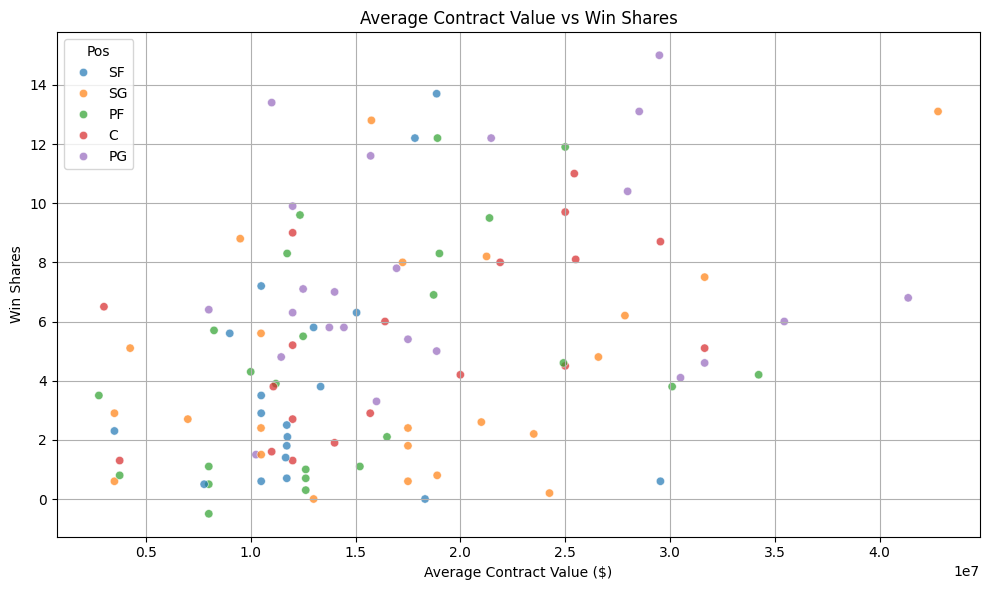

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_adv, x="Avg. Value", y="WS", hue="Pos", alpha=0.7)
plt.title("Average Contract Value vs Win Shares")
plt.xlabel("Average Contract Value ($)")
plt.ylabel("Win Shares")
plt.grid(True)
plt.tight_layout()
plt.show()

Line Plot of Players performance throughout the years of their contract

In [30]:
# Step 1: Estimate contract years for each player
contract_years = []
for _, row in contracts_df.iterrows():
    for i in range(row["Contract Length"]):
        contract_years.append({
            "Player": row["Player"],
            "Season": row["Signing Year"] + i,
            "Contract Start": row["Signing Year"],
            "Contract End": row["Signing Year"] + row["Contract Length"] - 1
        })
contract_years_df = pd.DataFrame(contract_years)

In [31]:
# Merge with advanced stats to track performance across contract years
performance_timeline = pd.merge(
    contract_years_df,
    advanced_stats_df,
    on=["Player", "Season"],
    how="left"
)

In [32]:
# Filter to players with enough data (at least 3 seasons in contract data)
players_with_3yr_contracts = performance_timeline["Player"].value_counts()[lambda x: x >= 3].index
filtered_timeline = performance_timeline[performance_timeline["Player"].isin(players_with_3yr_contracts)]


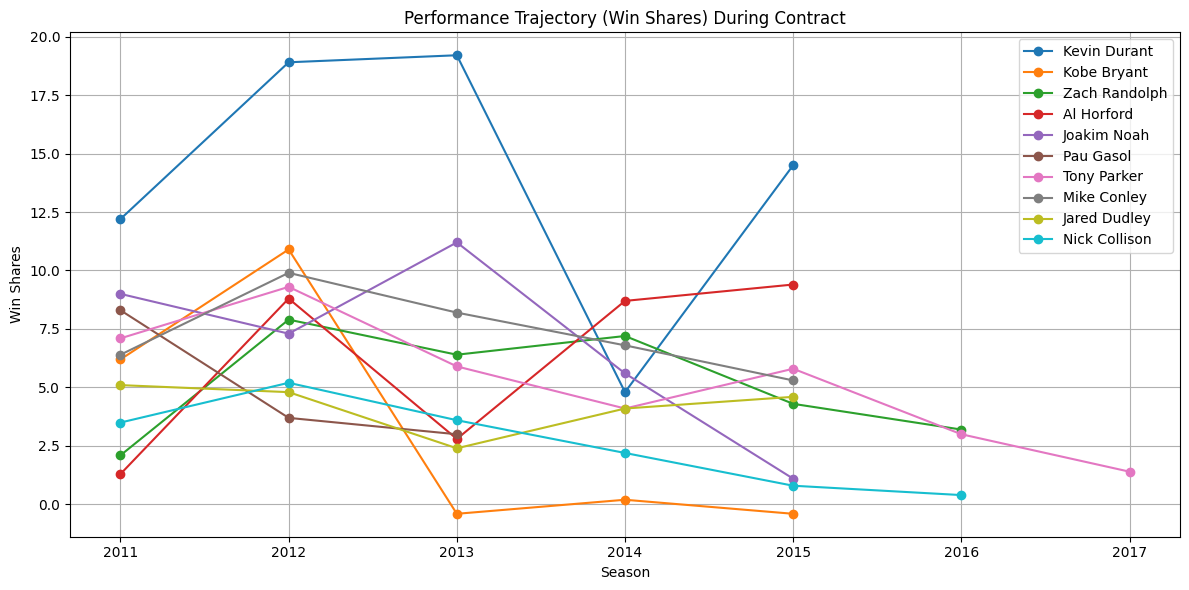

In [34]:
# Plot performance for 5 sample players across contract seasons
sample_players = filtered_timeline["Player"].unique()[:10]
plt.figure(figsize=(12, 6))
for player in sample_players:
    player_data = filtered_timeline[filtered_timeline["Player"] == player]
    plt.plot(player_data["Season"], player_data["WS"], marker='o', label=player)

plt.title("Performance Trajectory (Win Shares) During Contract")
plt.xlabel("Season")
plt.ylabel("Win Shares")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()